# Supplementary Figure 3: Simulation parameters for HHLR

The prior (dashed) and posterior (solid) distributions of the four parameters of one HHLR experiment. The top row gives the two parameters of the hail function and the bottom of the reporting function.

## Package imports

In [1]:
additional_package_lib <- "/scratch/w42/ig1052/rlibs"

suppressPackageStartupMessages({
  library(tidyverse)
  library(posterior, lib.loc = additional_package_lib)
  library(latex2exp, lib.loc = additional_package_lib)
  library(scico)
  library(patchwork)
})

## Functions and constants

In [2]:
# prior types as labelling in the files
prior_types <- c("informative", "misinformative", "uninformative")
# prior names for the figure
prior_names <- c("informative", "misleading", "uninformative")
# model name
model_name <- "sim_hail_mesh_report_dens_hhlr"
# directory where everything is located
base_dir <- "/g/data/w42/ig1052/bayesian_paper_data/model_eval"

# making model names
sim_names <- paste(model_name, prior_types, sep = "_")

In [3]:
make_parameter_plot <- function(prior_tibble, posterior_tibble, xlabel, vline){
  # Make the density plot for a given variable
  #
  # Inputs:
  #  prior tibble      tibble
  #                    contains an x-axis variable along with the density functions
  #                    to plot
  #  posterior_tibble  tibble
  #                    tibble with the posterior draws
  #  xlabel            str
  #                    label for the x-axis
  #  vline             float
  #                    location of true vertical lines
  # 
  # Outputs:
  #  _           tibble
  #              columns ready to be plotting with confidence bounds and 
  #              posterior mean 
  
  # given the prior tibble
  prior_tibble %>%
    # pivot longer to plot each of the priors
    pivot_longer(-x) %>%
    ggplot(aes(x = x)) + 
    geom_line(aes(y = value, color = name), linetype = "longdash") +
    # density plot of the posterior
    geom_density(aes(x = value, color = name), data = posterior_tibble %>% pivot_longer(everything())) +
    # true given the vline
    geom_vline(xintercept = vline, linetype = "dotted") +
    # labels
    xlab(TeX(xlabel)) +
    ylab("Density") +
    # colour
    scale_color_manual("Prior", values = scico::scico(3, begin = 0.2, end = 0.8, palette = "batlow")) + 
    # size
    theme_gray(base_size = 15)
}

## Read in data and prepare

In [4]:
# alpha1 - read in from each model 
suppressWarnings({
  posterior_hail1 <- map(1:3, 
    \(x) readRDS(paste(base_dir, sim_names[x], "results", paste0(sim_names[x], "_model_params_full.rds"), sep = "/")) %>%
           as_draws_df() %>%
           select(`beta_hail[1]`) %>%
           rename_with(\(y) str_to_title(prior_names[x]))
   ) %>%
  bind_cols()
})

# create prior tibble 
priors_hail1 <- tibble(x = seq(-10, -5.5, length.out = 200)) %>% # change range
  mutate(Informative = dnorm(x, mean = -8, sd = 1.0 / 6.0),
         Uninformative = dnorm(x, mean = -8, sd = 3.0 / 6.0),
         Misleading = dnorm(x, mean = -7, sd = 1.0 / 6.0)
        )

# make plot
p1 <- make_parameter_plot(priors_hail1, posterior_hail1, "$\\alpha_1$", -8)

In [5]:
# alpha2 - read in from each model
suppressWarnings({
  posterior_hail2 <- map(1:3, 
    \(x) readRDS(paste(base_dir, sim_names[x], "results", paste0(sim_names[x], "_model_params_full.rds"), sep = "/")) %>%
           as_draws_df() %>%
           select(`beta_hail[2]`) %>%
           rename_with(\(y) str_to_title(prior_names[x]))
   ) %>%
  bind_cols()
})

# create prior tibble
priors_hail2 <- tibble(x = seq(0, 0.5, length.out = 200)) %>% # change range
  mutate(Informative = dnorm(x, mean = 0.3, sd = 1.0 / 30.0) / (1 - pnorm(0, mean = 0.3, sd = 1.0 / 30.0)),
         Uninformative = dnorm(x, mean = 0.3, sd = 3.0 / 30.0) / (1 - pnorm(0, mean = 0.3, sd = 3.0 / 30.0)),
         Misleading = dnorm(x, mean = 0.0932, sd = 1.0 / 30.0) / (1 - pnorm(0, mean = 0.0932, sd = 1.0 / 30.0))
        )

# make plot
p2 <- make_parameter_plot(priors_hail2, posterior_hail2, "$\\alpha_2$", 0.3)

In [6]:
# beta1 - read in from each model
suppressWarnings({
  posterior_report1 <- map(1:3, 
    \(x) readRDS(paste(base_dir, sim_names[x], "results", paste0(sim_names[x], "_model_params_full.rds"), sep = "/")) %>%
           as_draws_df() %>%
           select(`beta_report[1]`) %>%
           rename_with(\(y) str_to_title(prior_names[x]))
   ) %>%
  bind_cols()
})

# create prior tibble
priors_report1 <- tibble(x = seq(-10, 1.5, length.out = 200)) %>% # change range
  mutate(Informative = dnorm(x, mean = -4.258, sd = 11.0 / 30.0),
         Uninformative = dnorm(x, mean = -4.258, sd = 55.0 / 30.0),
         Misleading = dnorm(x, mean = -2, sd = 11.0 / 30.0)
        )

# make plot
p3 <- make_parameter_plot(priors_report1, posterior_report1, "$\\beta_1$", -4.258)

In [7]:
# beta2 - read in from each model
suppressWarnings({
  posterior_report2 <- map(1:3, 
    \(x) readRDS(paste(base_dir, sim_names[x], "results", paste0(sim_names[x], "_model_params_full.rds"), sep = "/")) %>%
           as_draws_df() %>%
           select(`beta_report[2]`) %>%
           rename_with(\(y) str_to_title(prior_names[x]))
   ) %>%
  bind_cols()
})

# create prior tibble
priors_report2 <- tibble(x = seq(0, 1.5, length.out = 200)) %>% # change range
  mutate(Informative = dnorm(x, mean = 0.5, sd = 1.0 / 12.0) / (1 - pnorm(0, mean = 0.5, sd = 1.0 / 12.0)),
         Uninformative = dnorm(x, mean = 0.5, sd = 5.0 / 12.0) / (1 - pnorm(0, mean = 0.5, sd = 5.0 / 12.0)),
         Misleading = dnorm(x, mean = 1, sd = 1.0 / 12.0) / (1 - pnorm(0, mean = 1, sd = 1.0 / 12.0))
        )

# make tibble
p4 <- make_parameter_plot(priors_report2, posterior_report2, "$\\beta_2$", 0.5)

## Pull plot together

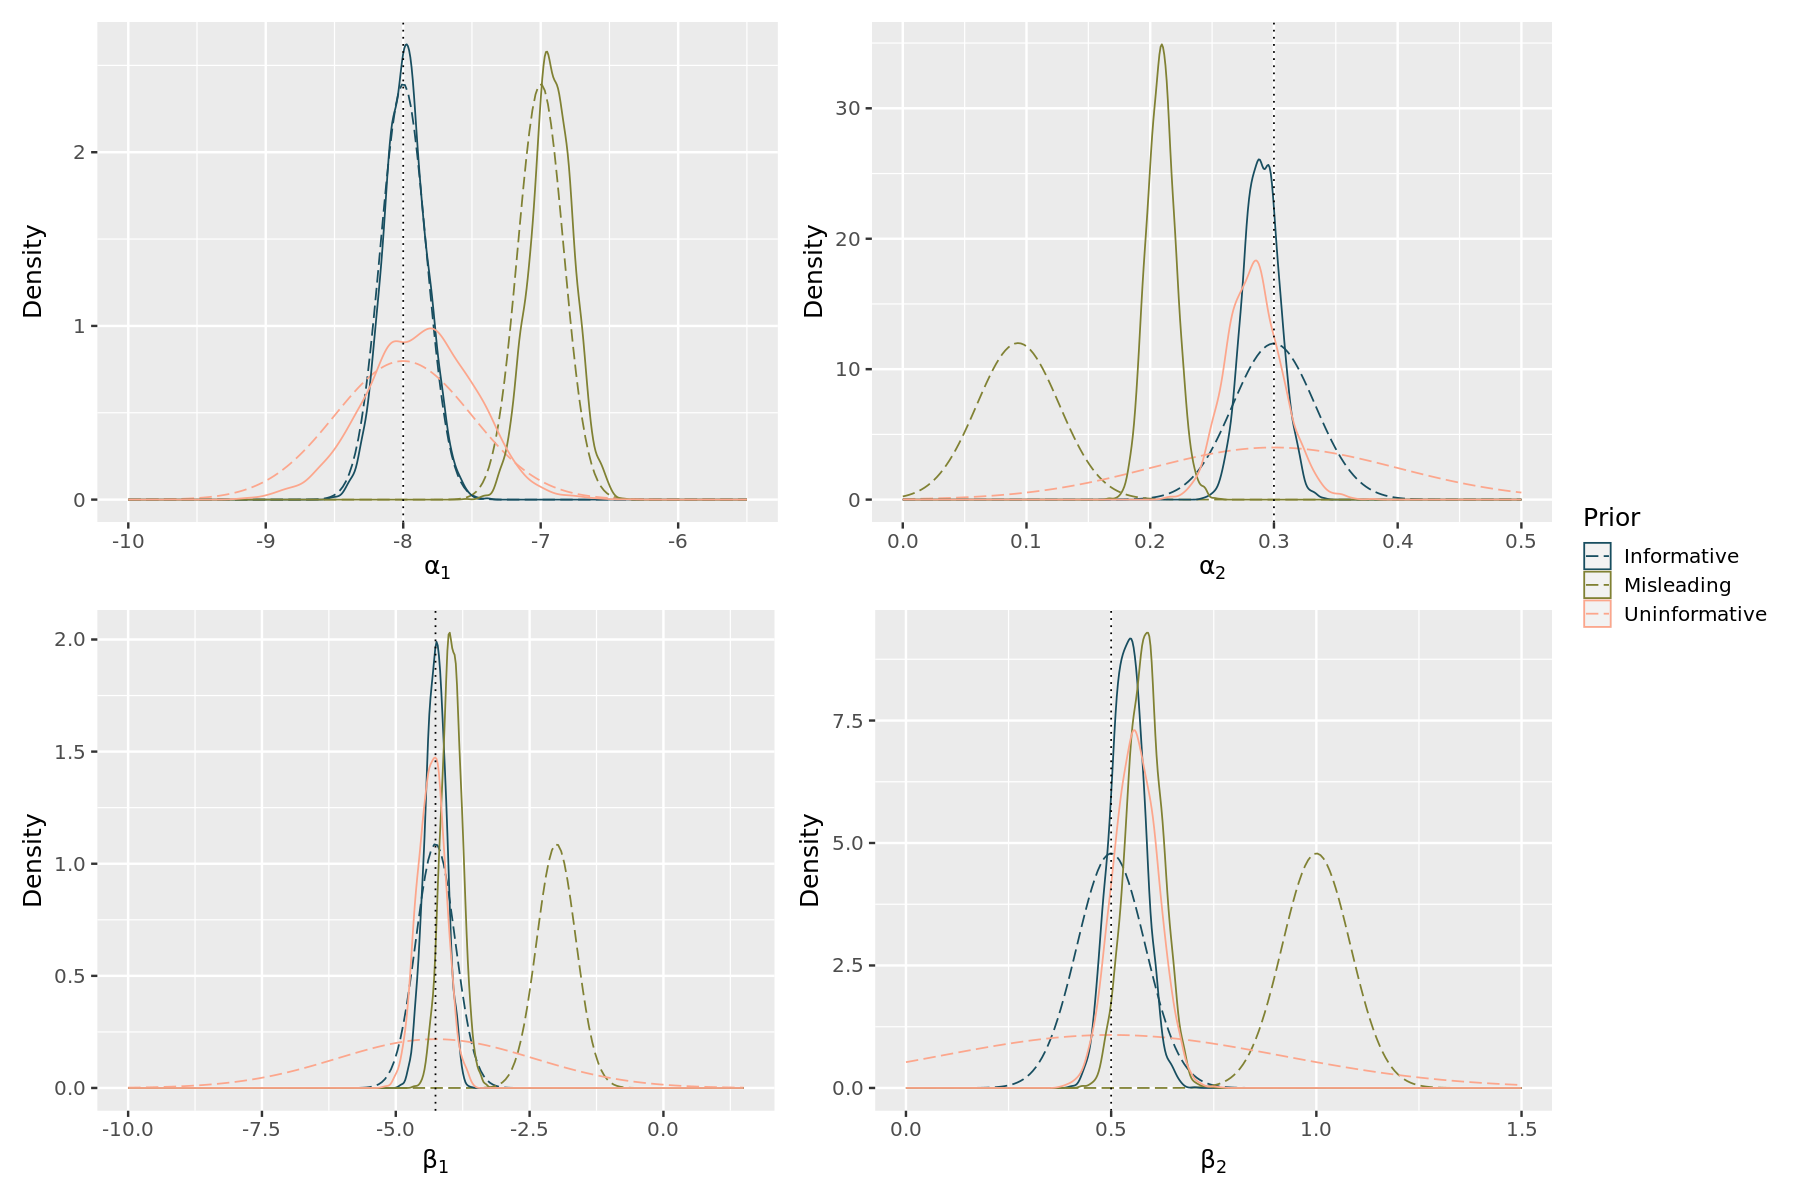

In [8]:
options(repr.plot.width = 15, repr.plot.height = 10)

(p1 + p2) / (p3 + p4) + plot_layout(guides = "collect")